In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr

In [13]:
kospi = fdr.DataReader("KS11", "2001-06-08" ,"2024-05-02")
kospi["Change"] = kospi["Change"] * 100
kospi = kospi.drop(
    ["Open", "High", "Low", "Close", "Volume", "UpDown", "Comp", "Amount", "MarCap"],
    axis=1,
)
kospi.rename(columns={"Change": "KOSPI"}, inplace=True)
kospi.head()

,KOSPI
Date,
2001-06-08,3.43
2001-06-11,-2.18
2001-06-12,-0.18
2001-06-13,1.14
2001-06-14,-0.05


In [ ]:
#모든 데이터의 행 길이가 일치하는지 확인
kospi.tail()

In [4]:
nasdaq = fdr.DataReader("IXIC", "2001-06-08")
nasdaq["Change"] = round(nasdaq["Adj Close"].pct_change() * 100, 2)
nasdaq = nasdaq.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
nasdaq = nasdaq.drop("2001-06-08", axis=0) #6/11의 변화율을 구하기 위해 6/8을 가져와서 계산한 뒤 na값인 6/8을 drop해줌
nasdaq.rename(columns={"Change": "NASDAQ"}, inplace=True)
nasdaq

,NASDAQ
Date,
2001-06-11,-2.00
2001-06-12,-0.04
2001-06-13,-2.23
2001-06-14,-3.66
2001-06-15,-0.77
...,...
2024-04-26,2.03
2024-04-29,0.35
2024-04-30,-2.04


In [ ]:
nasdaq.tail()

In [6]:
sap = fdr.DataReader("S&P500", "2001-06-08")
sap["Change"] = round(sap["Adj Close"].pct_change() * 100, 2)
sap = sap.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
sap = sap.drop("2001-06-08", axis=0)
sap.rename(columns={"Change": "S&P"}, inplace=True)
sap.head()

,S&P
Date,
2001-06-11,-0.84
2001-06-12,0.12
2001-06-13,-1.13
2001-06-14,-1.75
2001-06-15,-0.45


In [ ]:
sap.tail()

In [8]:
usa_treasury = fdr.DataReader("US10YT", "2001-06-08")
usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)
usa_treasury = usa_treasury.drop(
    ["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1
)
usa_treasury = usa_treasury.drop("2001-06-08", axis=0)
usa_treasury = usa_treasury.rename(columns={"Change": "USA_TREASURY"})
usa_treasury

C:\Users\user\AppData\Local\Temp\ipykernel_8308\2967678365.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usa_treasury["Change"] = round(usa_treasury["Adj Close"].pct_change() * 100, 2)


,USA_TREASURY
Date,
2001-06-11,-0.86
2001-06-12,-0.89
2001-06-13,0.32
2001-06-14,-0.80
2001-06-15,0.25
...,...
2024-04-26,-0.79
2024-04-29,-1.18
2024-04-30,1.56


In [ ]:
usa_treasury.tail()

In [18]:
japan = fdr.DataReader("N225", "2001-06-08")
japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)
japan = japan.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
japan = japan.drop("2001-06-08", axis=0)
japan.rename(columns={"Change": "Nikkei"}, inplace=True)
usd_krw = fdr.DataReader("USD/KRW", "2001-06-08")
usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)
usd_krw = usd_krw.drop(["High", "Low", "Open", "Close", "Volume", "Adj Close"], axis=1)
usd_krw = usd_krw.rename(columns={"Change": "USD/KRW"})
usd_krw

C:\Users\user\AppData\Local\Temp\ipykernel_8308\2027766455.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  japan["Change"] = round(japan["Adj Close"].pct_change() * 100, 2)
C:\Users\user\AppData\Local\Temp\ipykernel_8308\2027766455.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usd_krw["Change"] = round(usd_krw["Adj Close"].pct_change() * 100, 2)


,USD/KRW
Date,
2003-12-01,NaN
2003-12-02,-0.28
2003-12-03,-0.21
2003-12-04,-0.20
2003-12-05,-0.45
...,...
2024-04-29,0.39
2024-04-30,-0.18
2024-05-01,0.79


In [ ]:
japan.tail()

In [11]:
result_data = pd.concat([kospi, nasdaq, sap, usd_krw, usa_treasury, japan], axis=1)
result_data.fillna(result_data.mean(), inplace=True) #국가별로 휴장일이 다르기 때문에 빈값들을 채워줘야 함(수익률이니까 평균으로 채워넣는 게 좋음)
result_data = round(result_data, 2)

In [12]:
result_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5976 entries, 2001-06-08 to 2024-05-03
Freq: B
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KOSPI         5976 non-null   float64
 1   NASDAQ        5976 non-null   float64
 2   S&P           5976 non-null   float64
 3   USD/KRW       5976 non-null   float64
 4   USA_TREASURY  5976 non-null   float64
 5   Nikkei        5976 non-null   float64
dtypes: float64(6)
memory usage: 326.8 KB


In [19]:
#사용할 데이터는 csv로 뽑아두는 게 좋음
result_data.to_csv("./data/kospi_result_data.csv")

## 데이터 분리

In [22]:
X = result_data[['NASDAQ', 'S&P', 'USD/KRW', 'USA_TREASURY', 'Nikkei']]
y = result_data["KOSPI"]

## K-MEAN으로 평균 구하기

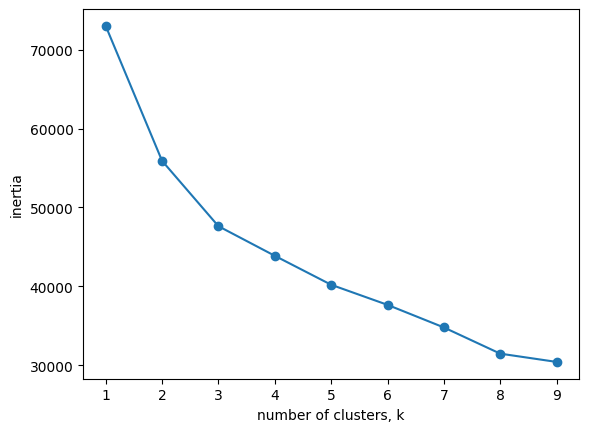

In [27]:
from sklearn.cluster import KMeans
ks = range(1, 10) #0부터 하면 안 된다는데 이유는 모르겠음
inertias = []
for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)
plt.plot(ks, inertias, "-o")
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

In [28]:
n_clusters = 3 #(위의 결과에서 3~5정도가 적당하겠다는 걸 알고 와야 함)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans[1:10]

array([1, 2, 2, 1, 2, 2, 2, 2, 2])

## T-SNE을 통한 데이터 확인

In [20]:
from sklearn.manifold import TSNE

In [23]:
t_sne = X.shape[0]
tsne = TSNE(n_components=2, 
            verbose=1, 
            perplexity=2, 
            n_iter=1000, 
            random_state=42)
tsne_result = tsne.fit_transform(X)

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 5976 samples in 0.011s...
[t-SNE] Computed neighbors for 5976 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5976
[t-SNE] Computed conditional probabilities for sample 2000 / 5976
[t-SNE] Computed conditional probabilities for sample 3000 / 5976
[t-SNE] Computed conditional probabilities for sample 4000 / 5976
[t-SNE] Computed conditional probabilities for sample 5000 / 5976
[t-SNE] Computed conditional probabilities for sample 5976 / 5976
[t-SNE] Mean sigma: 0.048742
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.135468
[t-SNE] KL divergence after 1000 iterations: 1.440403


In [24]:
tsne_result

array([[-1.5723460e+01, -3.0618301e-01],
       [-2.9714020e+01,  6.8925705e+01],
       [-3.6373180e+01,  3.7689289e+01],
       ...,
       [-6.5650398e+01, -2.4009641e-02],
       [ 3.0706490e+01, -8.2409698e+01],
       [ 5.4667479e-01,  1.9715099e+01]], dtype=float32)

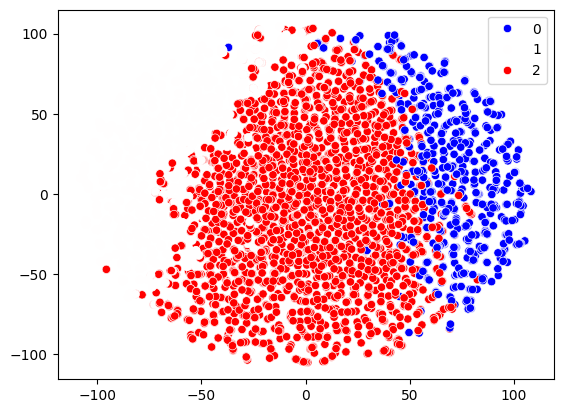

In [29]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_kmeans, s=20, cmap="bwr")
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=y_kmeans, palette="bwr")
plt.show()

In [30]:
#위의 데이터만으로는 각 포트폴리오가 어떤걸 포함하는지 알 수 없음
#클러스터에 관한 데이터를 따로 확보해야함
df1 = result_data.copy()
df1["cluster"] = y_kmeans
df1

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-08,3.43,0.04,0.03,0.01,0.03,0.03,2
2001-06-11,-2.18,-2.00,-0.84,0.01,-0.86,-1.52,1
2001-06-12,-0.18,-0.04,0.12,0.01,-0.89,-2.92,2
2001-06-13,1.14,-2.23,-1.13,0.01,0.32,-0.13,2
2001-06-14,-0.05,-3.66,-1.75,0.01,-0.80,0.18,1
...,...,...,...,...,...,...,...
2024-04-29,1.17,0.35,0.32,0.39,-1.18,0.03,2
2024-04-30,0.17,-2.04,-1.57,-0.18,1.56,1.24,2
2024-05-01,0.04,-0.33,-0.34,0.79,-1.94,-0.34,1


In [31]:
#군집 0 ~ 3 까지 분류된 데이터를 변수명에 추가
cluster_2 = df1[df1["cluster"] == 2]
cluster_1 = df1[df1["cluster"] == 1]
cluster_0 = df1[df1["cluster"] == 0]

In [32]:
cluster_total = df1.groupby("cluster").mean()
cluster_total["return"] = cluster_total.T.mean() #평균 수익률
cluster_total["std"] = cluster_total.T.std() #표준편차
cluster_total = cluster_total.T
cluster_total

cluster,0,1,2
KOSPI,0.309509,-0.393618,0.102262
NASDAQ,0.707193,-1.317081,0.312096
S&P,0.633229,-1.133285,0.251264
USD/KRW,-0.021207,0.094366,-0.014594
USA_TREASURY,3.423641,-2.513341,-0.061685
Nikkei,0.373994,-0.471065,0.099015
return,0.904393,-0.955671,0.114726
std,1.151157,0.840816,0.132818


In [35]:
cluster_total.describe()

cluster,0,1,2
count,8.000000,8.000000,8.000000
mean,0.935239,-0.731110,0.116988
std,1.069329,1.004687,0.123132
min,-0.021207,-2.513341,-0.061685
25%,0.357873,-1.179234,0.070613
50%,0.670211,-0.713368,0.108494
75%,0.966084,-0.271622,0.162429
max,3.423641,0.840816,0.312096


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  func(*args, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwarg

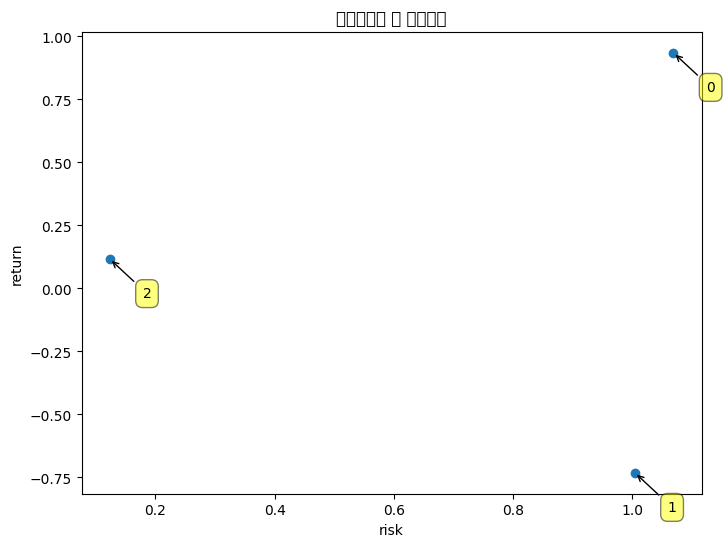

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(cluster_total.std(), cluster_total.mean())
plt.xlabel("risk")
plt.ylabel("return")
plt.title("평균수익률 및 표준편차")
for label, x, y in zip(
    cluster_total.columns, cluster_total.std(), cluster_total.mean()
):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(30, -30),
        textcoords="offset points",
        ha="right",
        va="bottom",
        bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
    )